I am using the "Wine" dataset found in sklearn.datasets to practice using the K-Mean Clustering method. Although, from the dataset, we know that there are three varieties of wine being detected, I will use the elbow method and the silhouette score to look for the optimum number of clusters.

In [47]:
import numpy as np #general use
import pandas as pd #dataset manipulation
from sklearn.datasets import load_wine 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # Data standardisation
from matplotlib import pyplot as plt

# Loading wine data
wine_df = load_wine(as_frame=True)

# Separating data into features and target
wine_features = wine_df.data
wine_target = wine_df.target

#examining data
print(wine_features.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

As all of the columns contain numerical values, there is not too much transformation for us to carry out. First I check for null values, then I standardise the data.

In [48]:
print(wine_features.isnull().sum())

# No null values found, standardising data using StandardScaler

scaler = StandardScaler()

scaled_features = pd.DataFrame(scaler.fit_transform(wine_features))

print(scaled_features.head())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
          0         1         2         3         4         5         6  \
0  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   

          7         8         9        10        11        12  
0 -0.659563  1.224884  0.25171

[356.00000000000034, 316.6191491283382, 201.06211362842848, 186.29459491561605, 173.69453641181823, 197.99424626109905, 172.9553231107045, 163.33191512504408, 155.77367149747792, 158.75486207134995]


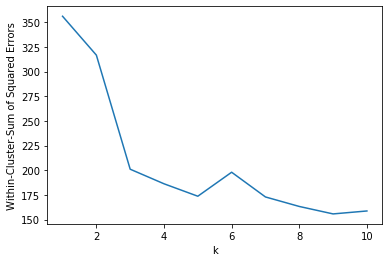

In [49]:
# Using elbow method to look for optimal value of k

# Calculating the Within-Cluster-Sum of Squared Errors

sse = []
for k in range(1, 11):
    # Generate centroids and predict labels
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    centroids = model.cluster_centers_
    pred_clusters = model.predict(scaled_features)
    curr_sse = 0
    
    # Calculate square of distance and add to current sum of squared errors
    for i in range(len(scaled_features)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (scaled_features.iloc[i, 0] - curr_center[0]) ** 2 + (scaled_features.iloc[i, 1] - curr_center[1]) ** 2 
    
    sse.append(curr_sse)

print(sse)

plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('Within-Cluster-Sum of Squared Errors')
plt.show()


We see the elbow at k=3, which matches the information we have about the data.

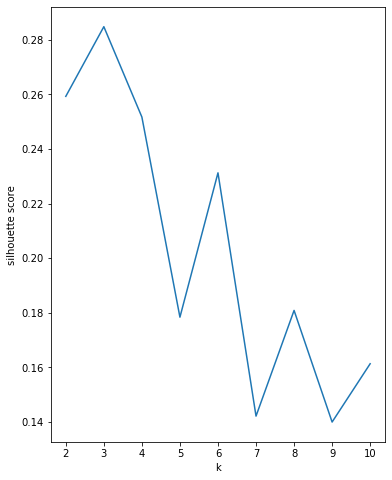

In [50]:
# Using silhouette scores to look for the optimal value of "k"

sil_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    labels = model.labels_
    sil_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(6, 8))
plt.plot(range(2, 11), sil_scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()


We can see that we get the highest silhouette score when k=3, which matches with the actual number of cultivars. However, the silhouette score seems very low.

In [51]:
wine_k_model = KMeans(n_clusters=3)
wine_k_model.fit(scaled_features)
wine_labels = wine_k_model.labels_

print(silhouette_score(scaled_features, wine_labels))



0.2848589191898987
